In [ ]:
"""
1. Unzip char:
    Chỉ unzip các char chưa zip
2. Thực hiện câu lệnh preprocess
    Chỉ thực hiện với các char chưa có tên
3. Loại audio dựa trên trim-wav
    Lần nào cũng được
4. Thực hiện các phép thống kê audio
    Tổng thời gian, phân phối thời gian,...

"""


## Unzip file

In [4]:
import zipfile
import os

def unzip_file(zip_path, extract_to):
    """
    Giải nén một tệp ZIP tới một thư mục cụ thể.

    Args:
        zip_path (str): Đường dẫn tới tệp ZIP.
        extract_to (str): Thư mục để giải nén nội dung.
    """
    # Kiểm tra tệp ZIP có tồn tại không
    if not os.path.exists(zip_path):
        raise FileNotFoundError(f"Tệp ZIP không tồn tại: {zip_path}")
    
    # Tạo thư mục đích nếu chưa tồn tại
    if not os.path.exists(extract_to):
        os.makedirs(extract_to)

    # Giải nén tệp ZIP
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Đã giải nén {zip_path} vào {extract_to}")

# Ví dụ sử dụng
zip_file = "/home2/tuannd/tuanlha/Dataset/VNese/VLSP-2023-NEU.zip"
output_dir = "/home2/tuannd/tuanlha/Dataset/VNese/VLSP-2023-NEU"
unzip_file(zip_file, output_dir)


Đã giải nén /home2/tuannd/tuanlha/Dataset/VNese/VLSP-2023-NEU.zip vào /home2/tuannd/tuanlha/Dataset/VNese/VLSP-2023-NEU


## Lọc audio
* hàm preprocess đã lọc audio dựa theo độ dài rồi
* lọc các audio có độ ồn cao

In [1]:
import os
import subprocess

In [2]:
audio_folder_path = '/home2/tuannd/tuanlha/Dataset/Visec/wavs'
command = f'python run_predict.py --mode predict_dir --pretrained_model weights/nisqa.tar --data_dir {audio_folder_path} --num_workers 8 --bs 30 --output_dir /home2/tuannd/tuanlha/temp_cp'
subprocess.run(command, shell=True, cwd="/home2/tuannd/tuanlha/NISQA")

Device: cuda


/home2/tuannd/tuanlha/NISQA/nisqa/NISQA_model.py:940: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path, map_location=self.dev)


Model architecture: NISQA_DIM
Loaded pretrained model from weights/nisqa.tar
# files: 5280
---> Predicting ...


/home/tuannd/.conda/envs/TuanLHA/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)
/home/tuannd/.conda/envs/TuanLHA/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)
/home/tuannd/.conda/envs/TuanLHA/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)
/home/tuannd/.conda/envs/TuanLHA/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected i

      deg  mos_pred  noi_pred  dis_pred  col_pred  loud_pred   model
00000.wav  2.534201  1.922776  3.765155  2.875723   2.916979 NISQAv2
00001.wav  2.643833  1.903174  4.164421  3.586848   3.643818 NISQAv2
00002.wav  3.153411  3.791752  4.118341  3.314754   2.761038 NISQAv2
00003.wav  2.540840  2.353930  3.680142  2.980893   2.641716 NISQAv2
00004.wav  3.011876  1.732031  3.940674  3.421925   3.422227 NISQAv2
00005.wav  3.943900  4.283936  4.440844  3.683833   4.200764 NISQAv2
00006.wav  2.223953  1.689965  4.108493  3.561774   3.492189 NISQAv2
00007.wav  3.413373  2.283530  4.146416  3.739653   3.939873 NISQAv2
00008.wav  1.979601  1.715251  3.418910  2.455762   1.931895 NISQAv2
00009.wav  3.075796  4.136179  4.190990  3.125621   3.379387 NISQAv2
00010.wav  3.238455  2.446526  3.945018  3.269669   3.326992 NISQAv2
00011.wav  1.620321  2.159494  3.212169  1.776423   2.592043 NISQAv2
00012.wav  2.302932  2.312306  3.633512  2.915801   3.801311 NISQAv2
00013.wav  2.167147  1.960436  3.8

CompletedProcess(args='python run_predict.py --mode predict_dir --pretrained_model weights/nisqa.tar --data_dir /home2/tuannd/tuanlha/Dataset/Visec/wavs --num_workers 8 --bs 30 --output_dir /home2/tuannd/tuanlha/temp_cp', returncode=0)

### Lọc audio có độ ồn nhỏ hơn 2.4/2.5

In [5]:
import pandas as pd

In [7]:
len(df)

5280

In [10]:
df = pd.read_csv('/home2/tuannd/tuanlha/temp_cp/NISQA_results.csv')
num_rows = len(df[(df['noi_pred'] < 2.2)])
print(f'Number of rows with noi_pred < 2.4: {num_rows}')
# num_rows = len(df[df['noi_pred'] > 2.5])
# print(f'Number of rows with noi_pred > 2.5: {num_rows}')

Number of rows with noi_pred < 2.4: 2644


## Tạo file lab

In [ ]:
import pandas as pd

df = pd.read_csv('/home2/tuannd/tuanlha/Dataset/Visec/data.csv')
df = df['']

## Kiểm tra phân phối thời gian dữ liệu gốc

In [6]:
import os
import wave
import contextlib

def get_total_duration(folder_path):
    total_duration = 0.0

    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.wav'):
                file_path = os.path.join(root, file)
                with contextlib.closing(wave.open(file_path, 'r')) as f:
                    frames = f.getnframes()
                    rate = f.getframerate()
                    duration = frames / float(rate)
                    total_duration += duration

    return total_duration

def get_duration_list(folder_path):
    duration_list = []

    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        with contextlib.closing(wave.open(file_path, 'r')) as f:
            frames = f.getnframes()
            rate = f.getframerate()
            duration = frames / float(rate)
            duration_list.append(duration)

    return duration_list

folder_path = '/home2/tuannd/tuanlha/PreprocessedData/preprocessed_data/trim_wav'  # Replace with the path to your folder
total_duration = get_duration_list(folder_path)
print(f'Total duration of all .wav files: {sum(total_duration)} seconds')

Total duration of all .wav files: 92675.14430839008 seconds


In [13]:
import pandas as pd
df_path = '/home2/tuannd/tuanlha/temp_cp/NISQA_results.csv'
df = pd.read_csv(df_path)
df_filtered = df[(df['noi_pred'] < 2.4) | (df['mos_pred'] <2.4)]
df_filtered.to_csv(f'/home2/tuannd/tuanlha/temp_cp/NISQA_results_filtered.csv', index=False)

In [14]:
df_filtered = pd.read_csv('/home2/tuannd/tuanlha/temp_cp/NISQA_results_filtered.csv')

lf0_folder = '/home2/tuannd/tuanlha/PreprocessedData/preprocessed_data/lf0'
mel_folder = '/home2/tuannd/tuanlha/PreprocessedData/preprocessed_data/mel'
trim_folder = '/home2/tuannd/tuanlha/PreprocessedData/preprocessed_data/trim_wav'

noi_audio_ls = df_filtered['deg'].tolist()

for audio_name in noi_audio_ls:
    trim_path = os.path.join(trim_folder, audio_name)
    tmp = audio_name.replace('.wav', '.npy')
    mel_path = os.path.join(mel_folder, tmp.replace('wav', 'mel'))
    lf0_path = os.path.join(lf0_folder, tmp.replace('wav', 'lf0'))
    os.remove(trim_path)
    os.remove(mel_path)
    os.remove(lf0_path)

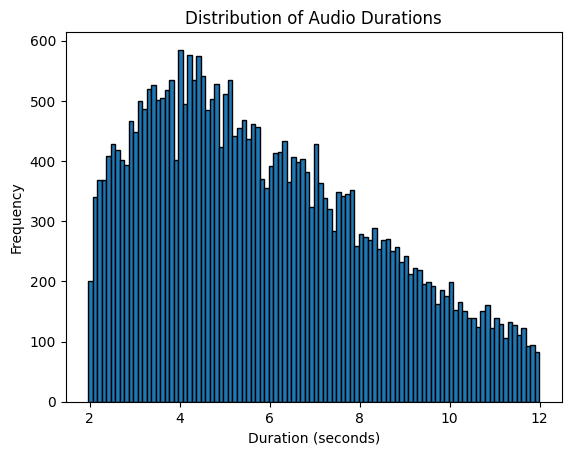

In [16]:
duration_ls = get_duration_list(folder_path)
import matplotlib.pyplot as plt

plt.hist(duration_ls, bins=100, edgecolor='black')
plt.title('Distribution of Audio Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
folder_name = 'HAS'

In [ ]:
def check_exist(episode, folder):
    '''Check if diary logs already exist
    exist:      return True
    not exist:  return False'''
    current_episode = [file_name for file_name in os.listdir(folder)]
    for ep in current_episode:
        if episode in ep:
            return True
    return False

## Loại audio không đạt tiêu chuẩn

### Đánh giá chỉ số Noisiness, Coloration, Discontinuity, and Loudness

In [ ]:
import os
import subprocess

In [ ]:
audio_folder_path = '/home2/tuannd/tuanlha/PreprocessedData/raw_path'
char_file = [dir for dir in os.listdir(audio_folder_path)]
for char in char_file:
    data_dir = os.path.join(audio_folder_path, char)
    command = f'python run_predict.py --mode predict_dir --pretrained_model weights/nisqa.tar --data_dir {data_dir} --num_workers 8 --bs 30 --output_dir /home2/tuannd/tuanlha/temp_cp'
    subprocess.run(command, shell=True, cwd="/home2/tuannd/tuanlha/NISQA")


## Remove after trim audio

In [11]:
df_path = '/home2/tuannd/tuanlha/temp/NISQA_results_trim_wav.csv'
df = pd.read_csv(df_path)
df_filtered = df[df['noi_pred'] < 2.5]
df_filtered.to_csv('/home2/tuannd/tuanlha/temp/NISQA_results_trim_wav_filtered.csv', index=False)
df_filtered.head()

,deg,mos_pred,noi_pred,dis_pred,col_pred,loud_pred,model
889,March7-wav-chapter2_6_mar7th_131.wav,1.213068,2.434822,3.233567,1.598394,1.900606,NISQAv2
1090,March7-wav-chapter2_9_mar7th_260.wav,2.995137,1.861755,4.255746,3.454147,2.634161,NISQAv2
1219,March7-wav-chapter3_18_mar7th_106.wav,3.915204,2.279675,4.485952,3.841226,2.677391,NISQAv2
1424,March7-wav-chapter3_2_mar7th_104.wav,1.293594,2.424782,2.850491,1.819796,1.786408,NISQAv2
1425,March7-wav-chapter3_2_mar7th_105.wav,0.968977,2.293154,2.742387,1.408886,1.709014,NISQAv2


In [2]:
import os

def count_files_in_directory(directory_path):
    file_count = 0
    for root, dirs, files in os.walk(directory_path):
        file_count += len(files)
    return file_count

directory_path = '/home2/tuannd/tuanlha/PreprocessedData/raw_path'  # Replace with your directory path
file_count = count_files_in_directory(directory_path)
print(f'Total number of files in the directory: {file_count}')

Total number of files in the directory: 23929


In [1]:
man_ls = ['Albedo', 'Aventurine', 'Boothiill', 'DanHeng', 'Gallagher', 'Gepard', 'JingYuan', 'Itto', 'Kaeya', 'Kaveh', 'Luka', 'Ratio', 'Sampo', 'Skott', 'Sunday', 'Tighnari', 'Venti', 'Welt', 'Yanqing', 'Zhongling']
chilren_ls = ['Bailu', 'Huohuo', 'Yunli', 'Misha', 'Collei', 'Asta', 'Guinaifen', 'Yanfei']
wtf = ['Cirrus', 'Hoolay', 'Layla', 'Nahida', 'Hanya','YuKong']
combine = man_ls + chilren_ls + wtf
combine

['Albedo',
 'Aventurine',
 'Boothiill',
 'DanHeng',
 'Gallagher',
 'Gepard',
 'JingYuan',
 'Itto',
 'Kaeya',
 'Kaveh',
 'Luka',
 'Ratio',
 'Sampo',
 'Skott',
 'Sunday',
 'Tighnari',
 'Venti',
 'Welt',
 'Yanqing',
 'Zhongling',
 'Bailu',
 'Huohuo',
 'Yunli',
 'Misha',
 'Collei',
 'Asta',
 'Guinaifen',
 'Yanfei',
 'Cirrus',
 'Hoolay',
 'Layla',
 'Nahida',
 'Hanya',
 'YuKong']

In [2]:
import os
raw_data_path = '/home2/tuannd/tuanlha/Dataset/Mihoyo/RawData/English'
girl_name = [dir for dir in os.listdir(raw_data_path) if dir not in combine]
girl_name

['March7',
 'Furina',
 'Himeko',
 'FireFly',
 'BlackSwan',
 'Natasha',
 'RaidenEi',
 'YaeMiko',
 'Navia',
 'Bronya',
 'Robin',
 'Qingque',
 'Pela',
 'FuXuan',
 'Acheron',
 'Seele',
 'Hook',
 'Clara',
 'Ayaka',
 'Kokomi',
 'Mona',
 'Ningguang',
 'Yoimiya',
 'Kafka',
 'Noelle',
 'Jingliu',
 'Hutao',
 'Feixiao']

## Filter character to train

In [4]:
import shutil

preprocessed_data_path = '/home2/tuannd/tuanlha/PreprocessedData/temp_preprocessed_data'
for dir in os.listdir(preprocessed_data_path):
    dir_path = os.path.join(preprocessed_data_path, dir)
    for file in os.listdir(dir_path):
        char_name = file.split('-')[0]
        file_path = os.path.join(dir_path, file)
        if char_name in girl_name:
            shutil.move(file_path, file_path.replace('temp_preprocessed_data', 'preprocessed_data'))
            os.remove(file_path)

In [5]:
raw_data_path = '/home2/tuannd/tuanlha/PreprocessedData/temp_raw_path'
for char_name in os.listdir(raw_data_path):
    if char_name not in girl_name:
        continue

    dir_path = os.path.join(raw_data_path, char_name)
    shutil.move(dir_path, '/home2/tuannd/tuanlha/PreprocessedData/raw_path')